In the previous chapters we started with the fundamentals of Python. Now we will continue with more practical examples of doing data analysis with Python using the Pandas library.

## Libraries

The power of Python (and many programming languages) is in the libraries.

A library (aka package) is a collection of files (aka python scripts) that contains **functions** that can be used to perform specific tasks. A library may also contain data. The functions in a library are typically related and used for a specific purpose, e.g. there are libraries for plotting, handling audio data and machine learning and many many more. Some libraries are built into python, but most packages need to be installed before you can use it.

Important to add: libraries are developed and maintained by other Python users. A popular library like Pandas has a large user base and the maintainers are supported by several funders, which makes it a reliable library that is updated very frequently. But this is not always the case, on the other side of the spectrum, a library can also be published once and not maintained at all.

## Pandas
The python library [**Pandas**](https://pandas.pydata.org/about/) is a popular open-source data analysis and data manipulation library for Python which was developed in 2008. The library has some similarities with R, mainly related to the DataFrame data type that is used to handle table like datasets.

Pandas is widely used in data analyses and machine learning, as it provides powerful tools for data handling and manipulation. Furthermore, it integrates well with other Python libraries for data analysis, machine learning, and statistical analysis, such as NumPy, Scikit-Learn, and StatsModels. 


In this first chapter we will explore the main features of Pandas related to reading and exploring a dataset. In the following chapters we will go into finding, selecting and grouping data, merging datasets and visualization. 

For this purpose, we will be using data from the <a url="https://figshare.com/articles/dataset/Portal_Project_Teaching_Database/1314459">Portal Project Teaching Database</a>: real world example of life-history, population, and ecological data and, occasionally, a small ad-hoc dataset to exaplain DataFrame operations.

## Preliminaries

Before we start our journey into Pandas functionalities, there are some preliminary operations to run. 

The Pandas library is not a built-in library of python, it needs to be installed and loaded. Installations instructions for Pandas are in the the [setup instructions](installation-and-setup.qmd) for this course. Assuming you already installed it, let's start importing the Pandas library and checking our installed version.

In [1]:
import pandas as pd
print(pd.__version__)

1.5.1


It is also possible to just type `import pandas`, but we chose to give the library an 'alias': `pd`. The main reason is that we can now use functions from the library by typing `pd` instead of `pandas` (see the following line  `print(pd.__version__)`)

To be able to read the data files that we will be using, we need to specify the location of the files (also referred to as 'path'). It is best practice to specify the path relative to the main project folder, so, in order to properly read our dataset, it's important to check that we are working in the main project folder. In order to do that, we will load another library called 'os', containing all sort of tools to interact with our operating system. The function ```os.getcwd()```, returns the current working directory (cwd).

In [2]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\Moope001\OneDrive - Universiteit Utrecht\Documents\programming\workshop-introduction-to-python\book


If the current working directory ends with `<...>/workshop-introduction-to-python`, where `<...>` is whatever directory you chose to download and unzip the course material, you are in the right place.
If not, use `os.chdir(<...>)` to change the working directory, where `<...>` is the full path of the `workshop-introductions-to-python` directory.

Let's store the relative path of our data into a variable and let's check if the data file actually exists using the function ```os.path.exists()```

In [3]:
data_file = '../course_materials/data/surveys.csv'
print(os.path.exists(data_file))

True


If the result is True, we are all set up to go!

## Reading data

The very first operation we will perform is loading our data into a Pandas **DataFrame** using ```pd.read_csv()```. 

In [4]:
surveys_df = pd.read_csv(data_file)

print(type(data_file))
print(type(surveys_df))

<class 'str'>
<class 'pandas.core.frame.DataFrame'>


Pandas can read quite a large variety of formats like the *comma-separated values* (CSV) and Excel file formats.

Sometimes values in CSV files are separated using ";" or tabs. The default separator Pandas expects is a comma, if it is different it is necessary to specify the separator in an argument, e.g.: `pd.read_csv(data_file, sep=";")`. The documentation of pandas provides a [full overview](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) of the arguments you may use for this function.

In Jupyter Notebook or Jupyter Lab you can visualise the DataFrame simply by writing its name in a code cell and running the cell (in the same way you would display the value of any variable). Let's have a look at our just created DataFrame:

In [5]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


By looking at the DataFrame we can finally understand what a DataFrame actually is: a 2-dimensional data structure storing different types of variables in columns. All rows in the DataFrame have a row index (starting from 0). The columns have names. The row indices and column names can be used to do operations on values in the column (we will go into this later). 

As you can see Jupyter only prints the first and last 5 rows separated by `...` . In this way the notebook remains clear and tidy (printing the whole DataFrame may result in a large table and a lot of scrolling to get to the next code cell).

It is, however, enough for a quick exploration of how the dataset looks like in terms of columns names, values, and potential reading errors.

<div class="alert alert-block alert-success">
<b>Exercise 1</b>
    
Now go to the Jupyter Dashboard in your internet browser and open the notebook `afternoon_exercises.ipynb` and do exercise 1.
</div>

::: {.callout-note}
As you can see in this exercise a DataFrame object comes with several methods that can be applied to the DataFrame. A method is similar to a function, but it can only be applied to the object it belongs to and has a different notation than a function.

Compare the notation of the function `len`: `len(surveys_df)`  
with the DataFrame specific method `shape`: `surveys_df.shape`
:::

## Exploring data

Now we will take a closer look into the actual values in the DataFrame. In order to do this it is helpful to have the column names at hand (easy for copy-pasting):

In [6]:
print(surveys_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


As you can see this gives you more information than just the column names. It is also possible to just print the column names using a for loop (see [chapter 4](Introduction_to_python_4.ipynb)):

In [7]:
for column in surveys_df.columns:
    print(column)

record_id
month
day
year
plot_id
species_id
sex
hindfoot_length
weight


Let's select the column *weight* in our DataFrame and let's run some statistics on it

In [8]:
surveys_df['weight']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
35544     NaN
35545     NaN
35546    14.0
35547    51.0
35548     NaN
Name: weight, Length: 35549, dtype: float64

Now let's plot the values in a histogram:



<Axes: ylabel='Frequency'>

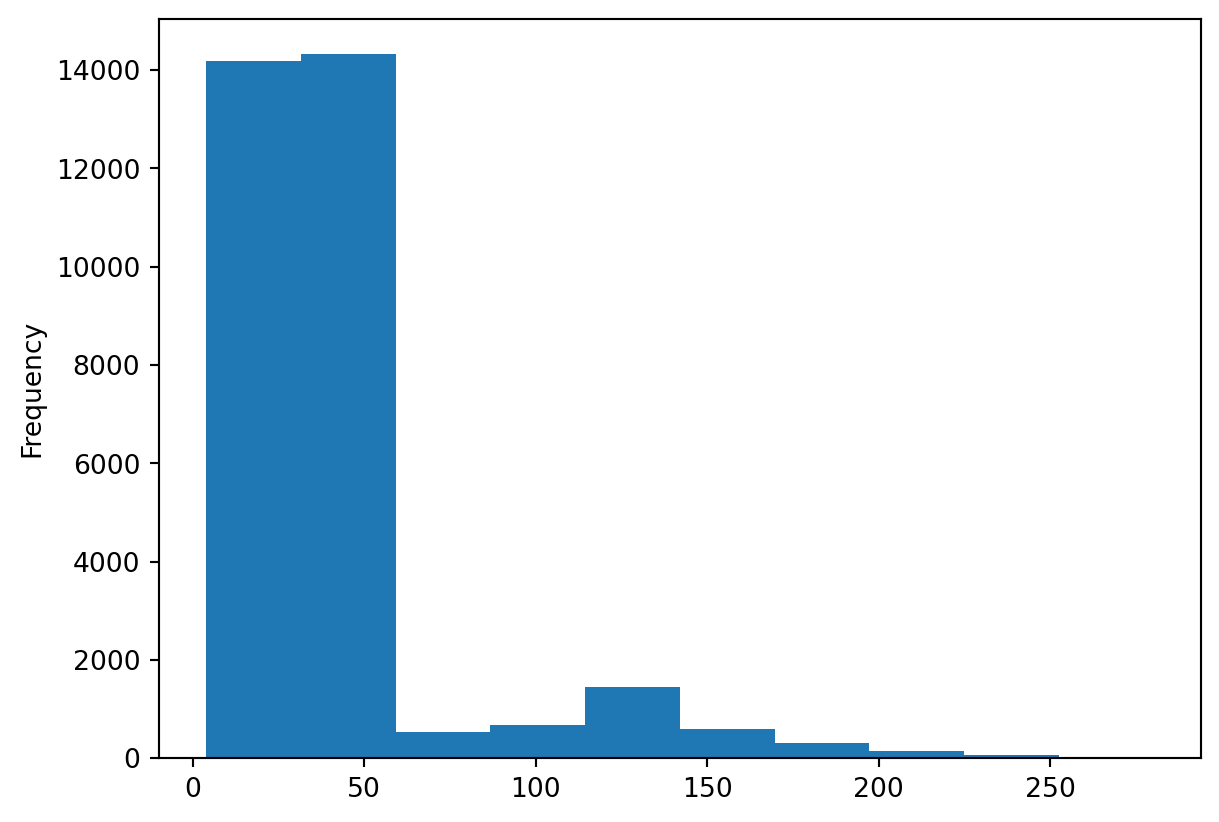

In [9]:
surveys_df['weight'].plot(kind='hist')

Did you notice how easy it was to obtain a summary plot of a column of our DataFrame? We can repeat the same for every column with a single line of code.

<Axes: ylabel='Frequency'>

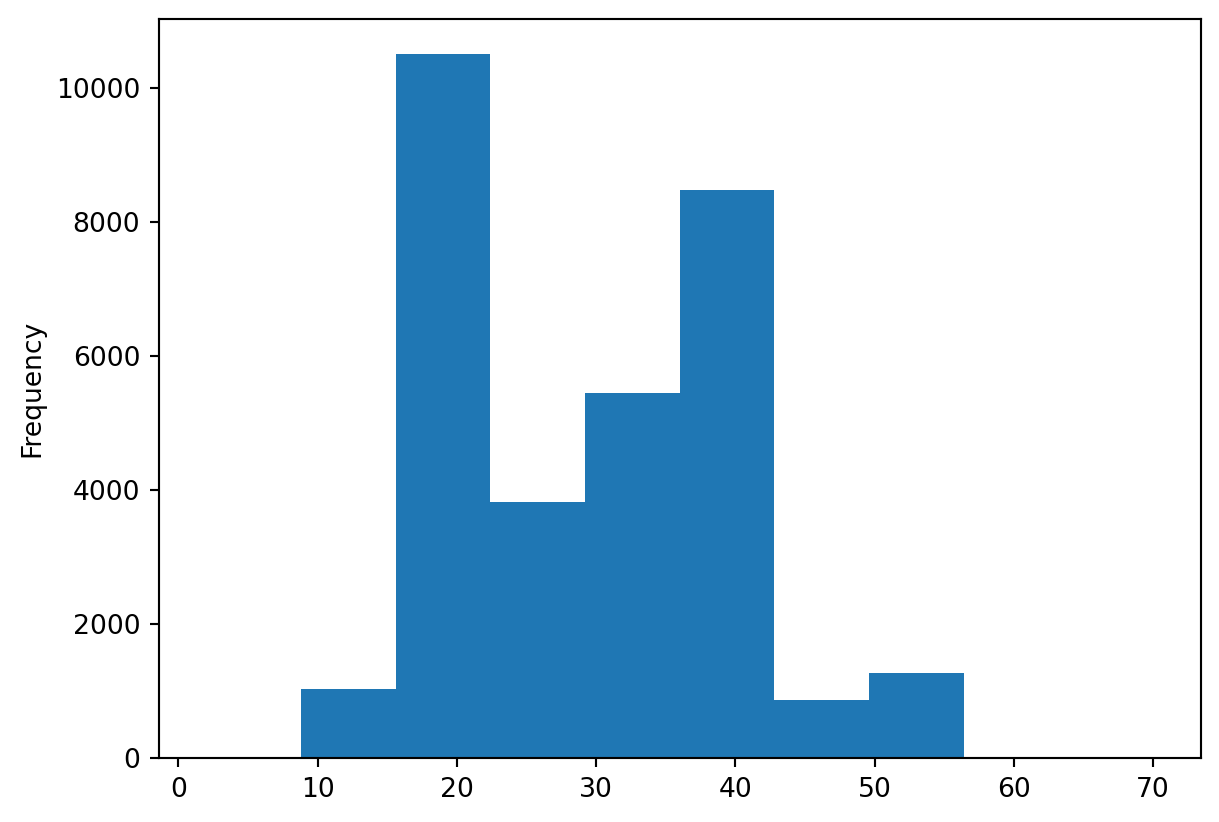

In [10]:
surveys_df['hindfoot_length'].plot(kind='hist')

We can also make quick scatterplots to explore the relation between two columns:

In [11]:
%matplotlib inline # what this does will be discussed in the last chapter about visualization
ax1 = surveys_df.plot(x='weight', y='hindfoot_length', kind='scatter')

UsageError: unrecognized arguments: # what this does will be discussed in the last chapter about visualization


<div class="alert alert-block alert-success">
<b>Exercise 2</b>
    
Now go to the Jupyter Dashboard in your internet browser and continue with exercise 2.
</div>

Instead of running the methods above one by one, we can obtain a statistical summary using the method ```.describe()```. Let's get a statistical summary for the weight column.

In [12]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

There are many more methods that can be used. For a complete overview, check out the [documentation of Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).
Some useful ones are the `unique` method to display all unique values in a certain column:

In [13]:
surveys_df['species_id'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

Or ```.nunique()``` to return the number of unique elements in a column. 

In [14]:
print(surveys_df['plot_id'].nunique())

24


Perhaps we want to get some insight into the values for certain species or plots, in the next chapter we will go into [making groups and selections](data-science-with-pandas-2.ipynb).